In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import simulation as sim
import control as control

In [3]:
clock = sim.Model("clock", control.Clock())
ctrl = sim.Controller("counter", control.Counter())
profile = sim.Controller("profile", control.ProfileRegulator())
model = sim.Compound("model", [clock, ctrl, profile])
world = sim.Simulation(model)
clock.connect("time", world.get("time"))
ctrl.connect("signal", clock.get("signal"))
profile.connect("signal", clock.get("signal"))
profile.connect("time", world.get("time"))
clock.setparam('frequency',0.12)
ctrl.setparam('size',5)
profile.setparam('profile', [(0,0), (10,15),(40,0)])
model.init()

In [4]:
model.getallparams()

{'clock': {'clock': 0.0, 'frequency': 0.12},
 'counter': {'value': 4, 'size': 5},
 'profile': {'target': 0,
  'profile': [(-1e+17, 0.0), (0, 0), (10, 15), (40, 0)]}}

In [5]:
sym = pd.DataFrame(world.simulate(0.0,80.0,0.0001))

In [6]:
sym

,time,clockclock,countervalue,profiletarget
0,0.0000,0.000000,4,0
1,0.0001,8.333333,3,0
2,0.0002,8.333333,3,0
3,0.0003,8.333333,3,0
4,0.0004,8.333333,3,0
...,...,...,...,...
799995,79.9995,83.333333,4,0
799996,79.9996,83.333333,4,0
799997,79.9997,83.333333,4,0
799998,79.9998,83.333333,4,0


<IPython.core.display.Javascript object>


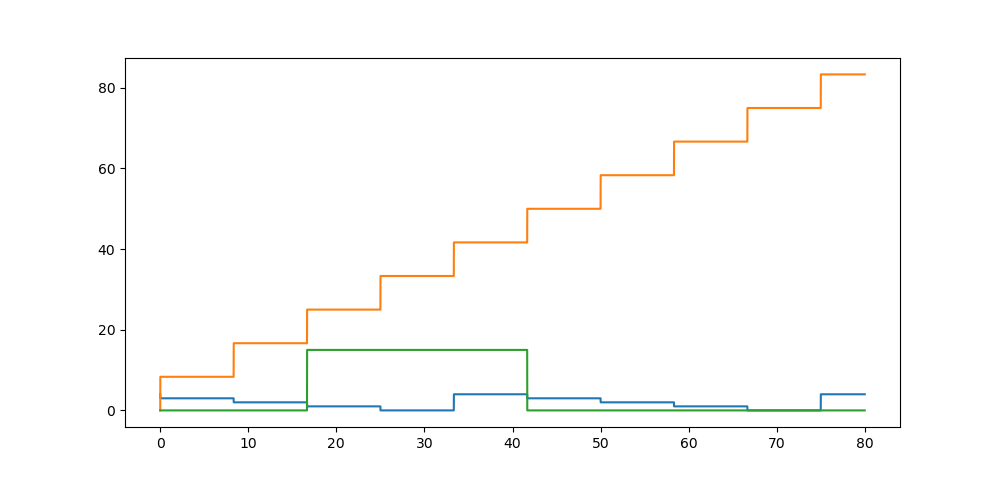

In [7]:
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_subplot(1, 1, 1)
ax.plot(sym[['time']],sym[['countervalue']])
ax.plot(sym[['time']],sym[['clockclock']])
ax.plot(sym[['time']],sym[['profiletarget']])